# Filter Bank Common Spatial Pattern
Attempt at implementing filter-bank common spatial filter (FBCSP) on BCI Competition IV 2a Dataset
  
**References:**   

[1] Kai Keng Ang, Zheng Yang Chin, Haihong Zhang and Cuntai Guan, "Filter Bank Common Spatial Pattern (FBCSP) in Brain-Computer Interface," 2008 IEEE International Joint Conference on Neural Networks (IEEE World Congress on Computational Intelligence), Hong Kong, 2008, pp. 2390-2397, doi: 10.1109/IJCNN.2008.4634130.    
[2] Ang, K. K., Chin, Z. Y., Wang, C., Guan, C., & Zhang, H. (2012). Filter Bank Common Spatial Pattern Algorithm on BCI Competition IV Datasets 2a and 2b. Frontiers in Neuroscience, 6. doi: 10.3389/fnins.2012.00039

# BCI Competition IV Dataset 2a (.npz data)
Information Given in Documentation

From the documentation it is known that:
* 25 electrodes are used, first 22 are EEG, last 3 are EOG
* Sampling frequency (fs) is 250Hz
* 9 subjects
* 9 run (run 1-3 are for eye movement, run 4-9 is MI)  
  

**-- Time Duration--**  
1 trials                          = 7-8s  
1 run              = 48 trials    = 336-384s  
1 session = 6 runs = 288 trials   = 2016-2304s

About the recording of eye movement
* run 1 => 2 mins with eyes open
* run 2 => 1 min with eyes closed
* run 3 => 1 min with eye movements

![timing-scheme-paradigm.png](./img/timing-scheme-paradigm.png) 

# Nathan Dayie Documentation

Last Updated: 4/2/2025

The original notebook only classified the training dataset into the left hand and right hand classes. It did so by splitting the training dataset (denoted as AOXT.npz files) 80/20, 80% used to train a classic ML model and 20% used to test the model. Eventually, we want to use 100% of the training dataset to train a deep learning model and see if it can better classify this dataset than the classical models. This final goal will be approached in steps, step 0 of which has already been completed by working through this original notebook.

#### Step 0 (complete as of 2/11/25) - Apply classical ML model to classify BCI Comp IV Dataset 2a (training data) into left hand and right hand classes.

##### Modifications to notebook:
- the original notebook only looked at subject's 1-3, but I modified it to classify all 9 subjects
- this mostly just meant adjusting for loops that went in range(1,4) to range(1,ns) where ns = 10, 1 more than the number of subjects there were in the data set

#### Step 1 (started 2/12/25) - Apply classical ML model to classify BCI Comp IV Dataset 2a (training data) into left hand, right hand, both feet, and tongue classes.

##### Modifications to notebook:
- added code to account for both feet (class 3) and tongue (class 4) classes

#### Step 2 (started 3/26/2025) - Train classical ML model on 100% of BCI Comp training dataset and test on BCI Comp evaluation dataset

##### Modifications to notebook:
- added code to add a dictionary for the evaluation data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Loading dataset

In [3]:
# First import the data

# Number of subject, n + 1 for iteration purpose (there are 9 subjects)
ns = 10

# Creating dict to store original data and modified data
ori_data = dict() # ori_data will serve as initial loaded data that will remain unchanged
mod_data = dict() # mod_data will contain modified original data

# Step 2 Modification
eval_data = dict() # eval_data will contain the original evaluation data
mod_eval_data = dict() # mod_eval_data will contain modified evaluation data

In [4]:
# Function to count subject
def subject_counter(i):
    return 'subject0{}'.format(i)

In [31]:
# Path manipulation if running in dev container
if os.getcwd() == '/':
    print("Running the notebook it inside dev container..")
    base_dir = os.environ["DOCKER_WORKDIR"]
else:
    print("Running the notebook locally..")
    base_dir = os.getcwd()

Running the notebook locally..


In [32]:
# Load the training data of all subjects

# Iter over all data path then store them in sub0X variable
for i in range(1, ns):
    data_path = os.path.join('A{:02d}T.npz'.format(i))
    eval_data_path = os.path.join('A{:02d}E.npz'.format(i))
    subject = 'subject{:02d}'.format(i)
    
    # Load EEG data from datapath and store into subj0X variable then store into data dictionary
    ori_data[subject] = np.load(data_path)
    print(f"[{subject}] Raw train EEG shape before filtering:", ori_data[subject]['s'].shape)
    eval_data[subject] = np.load(eval_data_path) # Step 2 modification
    # Add this after loading
    print(f"[{subject}] Raw eval EEG shape before filtering:", eval_data[subject]['s'].shape)


[subject01] Raw train EEG shape before filtering: (672528, 25)
[subject01] Raw eval EEG shape before filtering: (687000, 25)
[subject02] Raw train EEG shape before filtering: (677169, 25)
[subject02] Raw eval EEG shape before filtering: (662666, 25)
[subject03] Raw train EEG shape before filtering: (660530, 25)
[subject03] Raw eval EEG shape before filtering: (648775, 25)
[subject04] Raw train EEG shape before filtering: (600915, 25)
[subject04] Raw eval EEG shape before filtering: (660047, 25)
[subject05] Raw train EEG shape before filtering: (686120, 25)
[subject05] Raw eval EEG shape before filtering: (679863, 25)
[subject06] Raw train EEG shape before filtering: (678980, 25)
[subject06] Raw eval EEG shape before filtering: (666373, 25)
[subject07] Raw train EEG shape before filtering: (681071, 25)
[subject07] Raw eval EEG shape before filtering: (673135, 25)
[subject08] Raw train EEG shape before filtering: (675270, 25)
[subject08] Raw eval EEG shape before filtering: (687792, 25)


In [33]:
# Peek into ori_data type and its keys 
print(type(ori_data['subject01']))
# print(type(ori_data['subject01']['s']))
print(ori_data['subject01'].files) # can replace 01 with 01-09 for subject0X key, and will get same output
# the type of each value behind each key ['s', 'etyp', 'epos', 'edur', 'artifacts'] is a numpy.ndarray

<class 'numpy.lib.npyio.NpzFile'>
['s', 'etyp', 'epos', 'edur', 'artifacts']


In [34]:
# peak at data inside of ori_data['subject01']['artifacts'] using ravel
# numpy.ndarray.ravel() flattens an m x n array into a 1 x mn array and displays it
ori_data['subject01']['artifacts'].ravel()[20:50]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

Explanation regarding contents of the keys inside each subject data:
* **s**: 's' contains continuous time-series recorded EEG signals are, shape of M x N array. Size may vary between subjects but N is fixed to 25, indicates 25 electrodes with 22 first EEG and 3 last EOG
* **etype**: 'etyp' stands for event type which indicate event occurence, event code will be describe in subsequent table
* **epos**: 'epos' stands for event position, denoting corresponding event begins at n-th sample at **'s'**
* **edur**: 'edur' stands for event duration, denoting duration of corresponding event
* **artifacts**: size of 288 x 1, 288 comes form 6 x 48, 6 runs where @run has 48 trials, @class has 12 trials

In [5]:
# ori_data will contain original data that is the raw file
# mod_data will contain modified original data

# Initialize 'subject0x' dict inside mod_data
for i in range(1, ns):
    subj = subject_counter(i)
    mod_data[subj] = {}
    mod_eval_data[subj] = {} # Step 2 Modification

In [36]:
# Peek into different shape of recorded data/'s' between subjects
print('Sample\tElectrodes')
for i in range(1, ns):
    subj_temp = subject_counter(i)
    print(f"{subj_temp}\t{ori_data[subj_temp]['s'].shape}")
    print(f"{subj_temp}\t{eval_data[subj_temp]['s'].shape}")


Sample	Electrodes
subject01	(672528, 25)
subject01	(687000, 25)
subject02	(677169, 25)
subject02	(662666, 25)
subject03	(660530, 25)
subject03	(648775, 25)
subject04	(600915, 25)
subject04	(660047, 25)
subject05	(686120, 25)
subject05	(679863, 25)
subject06	(678980, 25)
subject06	(666373, 25)
subject07	(681071, 25)
subject07	(673135, 25)
subject08	(675270, 25)
subject08	(687792, 25)
subject09	(673328, 25)
subject09	(675098, 25)


In [37]:
# First extract the sample data from ori_data into mod_data
for i in range(1, ns):
    subj = subject_counter(i)
    mod_data[subj]['raw_EEG'] = ori_data[subj]['s']
    mod_eval_data[subj]['raw_EEG'] = eval_data[subj]['s'] # Step 2 Modification

In [38]:
# Visualizing sample_data inside subject01
# You can see that it has 25 electrodes stored in columns
# pd.DataFrame(mod_eval_data['subject01']['raw_EEG']).head() # Step 2 Modification

# Preprocessing

In [39]:
# Removing last three EOG electrode using np.delete, store data as EEG_only to each subject dict
for i in range(1, ns):
    subj = subject_counter(i)
    mod_data[subj]['raw_EEG'] = np.delete(mod_data[subj]['raw_EEG'], np.s_[22:], 1)
    mod_eval_data[subj]['raw_EEG'] = np.delete(mod_eval_data[subj]['raw_EEG'], np.s_[22:], 1) # Step 2 Modification

## Bandpass Filtering
The first stage employing a filter bank is to decompose EEG into multiple frequency pass band, using causal Chebysev Type II filter/ Butterworth Filter.  
A total of 9 band-pass filters are used, namely, 4-8, 8-12, ... 36-40 Hz  
These frequency ranges are used because they yielf a stable frequency response and cover range of 4-40 Hz

In [40]:
# Band pass filter with butterworth filter
from scipy.signal import butter, lfilter
from scipy.signal import freqz

In [41]:

def butter_bandpass_filter(signal, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b,a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, signal, axis=-1)
    
    return y

### Practice
Create arbitrary signal and using butterworth signal as band-pass filter

In [42]:
# # INPUT
# # sampling frequency
# fs = 500

# # time
# t = np.arange(0, 5, 1/fs)

# # Three signals with various freq
# x1 = np.sin(2 * np.pi * 6 * t)
# x2 = np.sin(2 * np.pi * 7 * t)
# x3 = np.sin(2 * np.pi * 50 * t)
# x = x1 + x2 + x3

In [43]:
# # Plot input
# plt.figure(figsize=(5, 3), dpi=80)
# plt.clf()
# plt.plot(t, x)
# plt.xlabel('time (seconds)')
# plt.show()

In [44]:
# # OUTPUT
# lowcut = 4
# highcut = 8
# y= butter_bandpass_filter(x, lowcut, highcut, fs, order=5)

In [45]:
# # Plot output
# plt.figure(figsize=(5, 3), dpi=80)
# plt.clf()
# plt.plot(t, y, label='Filtered signal (%g Hz)' %fs)
# plt.xlabel('time (seconds)')
# plt.grid(True)
# plt.show()

In [46]:
# # OUTPUT
# lowcut = 36
# highcut = 40
# y= butter_bandpass_filter(x, lowcut, highcut, fs, order=5)

In [47]:
# # Plot output
# plt.figure(figsize=(5, 3), dpi=80)
# plt.clf()
# plt.plot(t, y, label='Filtered signal (%g Hz)' %fs)
# plt.xlabel('time (seconds)')
# plt.grid(True)
# plt.show()

### Filtering EEG signal with Butterworth Band-pass
Following the steps mentioned in [1], there will be 8 band-pass filter with bandwidth of:
1. 4-8Hz
2. 8-12Hz
3. 12-16Hz
4. 16-20Hz
5. 20-24Hz
6. 24-28Hz
7. 28-32Hz
8. 32-36Hz
9. 36-40Hz

*Note*   
Apply filter to the time-series axis, thus set 'raw_EEG' inside each subject to shape of N x T (i.e. electrodes x samples)

In [48]:
# Transpose all 'raw_EEG' data
for i in range(1, ns):
    subj = subject_counter(i)
    
    while mod_data[subj]['raw_EEG'].shape[0] != 22:
        mod_data[subj]['raw_EEG'] = mod_data[subj]['raw_EEG'].T
        mod_eval_data[subj]['raw_EEG'] = mod_eval_data[subj]['raw_EEG'].T # Step 2 Modification
    
    print(f"Test: {subj}\t{mod_data[subj]['raw_EEG'].shape}")
    print(f"Eval: {subj}\t{mod_eval_data[subj]['raw_EEG'].shape}") # Step 2 Modification

Test: subject01	(22, 672528)
Eval: subject01	(22, 687000)
Test: subject02	(22, 677169)
Eval: subject02	(22, 662666)
Test: subject03	(22, 660530)
Eval: subject03	(22, 648775)
Test: subject04	(22, 600915)
Eval: subject04	(22, 660047)
Test: subject05	(22, 686120)
Eval: subject05	(22, 679863)
Test: subject06	(22, 678980)
Eval: subject06	(22, 666373)
Test: subject07	(22, 681071)
Eval: subject07	(22, 673135)
Test: subject08	(22, 675270)
Eval: subject08	(22, 687792)
Test: subject09	(22, 673328)
Eval: subject09	(22, 675098)


In [49]:
# Create function that could bandpass filtered one subject
def butter_bandpass_one_subject(data, subj, lowcut, highcut, fs, interval=None):

    # STORE DATA LOCALLY RATHER THAN IN RAM (RAM updates)
    os.makedirs("./preprocessed4", exist_ok=True) # RAM updates
    
    print('Processing ', subj)
    
    # Create new key 'EEG_filtered' to store filtered EEG of each subject
    data[subj]['EEG_filtered'] = {}
    
    # Current raw EEG
    temp_raw_EEG = data[subj]['raw_EEG']
    print(f"{subj}: {temp_raw_EEG.shape}")
    
    if interval is not None:
        startband = np.arange(lowcut, highcut, step = interval)
        
        for start in startband:
            # This will be new key inside the EEG_filtered
            band = "{:02d}_{:02d}".format(start, start+interval)
            
            print('Filtering through {} Hz band'.format(band))

            # Save Memory Changes  vvv
            filtered_EEG = butter_bandpass_filter(temp_raw_EEG, start, start+interval, fs) # temp var to hold filtered data

            save_path = f"./preprocessed4/{subj}_{band}_filtered.npz" # pathway to save current preprocessed band
            np.savez_compressed(save_path, EEG=filtered_EEG) # save processed band to pathway defined above
            data[subj]['EEG_filtered'][band] = {}
            data[subj]['EEG_filtered'][band]['file_path'] = save_path # store saved path in dictionary
            
            del filtered_EEG  # free memory to help later cells (can comment out)

            # Save Memory Changes  ^^^

            # # Bandpass filtering
            # data[subj]['EEG_filtered'][band]['EEG_all'] = butter_bandpass_filter(temp_raw_EEG, start, start+interval, fs)
            # print(f"{subj}_{band}\t{data[subj]['EEG_filtered'][band]['EEG_all'].shape}")
    else:
        # This will be new key inside the EEG_filtered
        band = "{:02d}_{:02d}".format(lowcut, highcut)

        # Save Memory Changes  vvv
        filtered_EEG = butter_bandpass_filter(temp_raw_EEG, lowcut, highcut, fs) # temp var to hold filtered data

        save_path = f"./preprocessed4/{subj}_{band}_filtered.npz" # pathway to save current preprocessed band
        np.savez_compressed(save_path, EEG=filtered_EEG) # save processed band to pathway defined above
        data[subj]['EEG_filtered'][band]['file_path'] = save_path # store saved path in dictionary
        
        del filtered_EEG  # free memory to help later cells (can comment out)

        # Save Memory Changes  ^^^

        # data[subj]['EEG_filtered'][band]['EEG_all'] = butter_bandpass_filter(temp_raw_EEG, lowcut, highcut, fs)


In [50]:
def butter_bandpass_one_subject_eval(eval_data_dict, subj, lowcut, highcut, fs, interval=None):
    os.makedirs("./preprocessed4_eval", exist_ok=True)

    print(f"\nProcessing eval subject {subj}")
    
    # Extract raw EEG
    temp_raw_EEG = eval_data_dict[subj]['raw_EEG']
    print(f"  Raw EEG shape: {temp_raw_EEG.shape}")
    
    # Prepare dict for saving paths
    eval_data_dict[subj]['EEG_filtered'] = {}

    if interval is not None:
        startband = np.arange(lowcut, highcut, step=interval)
        for start in startband:
            band = "{:02d}_{:02d}".format(start, start + interval)
            print(f"  🔍 Filtering {band} Hz")

            # Apply bandpass filter
            filtered_EEG = butter_bandpass_filter(temp_raw_EEG, start, start + interval, fs)

            # Save to file
            save_path = f"./preprocessed4_eval/{subj}_{band}_eval_filtered.npz"
            np.savez_compressed(save_path, EEG=filtered_EEG)

            # Store file path in dictionary
            eval_data_dict[subj]['EEG_filtered'][band] = {'file_path': save_path}
            print(f"     💾 Saved to {save_path} | Shape: {filtered_EEG.shape}")

            del filtered_EEG  # optional for memory
    else:
        # One band only
        band = "{:02d}_{:02d}".format(lowcut, highcut)
        filtered_EEG = butter_bandpass_filter(temp_raw_EEG, lowcut, highcut, fs)
        save_path = f"./preprocessed4_eval/{subj}_{band}_eval_filtered.npz"
        np.savez_compressed(save_path, EEG=filtered_EEG)
        eval_data_dict[subj]['EEG_filtered'][band] = {'file_path': save_path}
        print(f"  💾 Saved to {save_path} | Shape: {filtered_EEG.shape}")
        del filtered_EEG


In [51]:
# # Bandpass filtering all subject (TRAIN DATA)
# lowcut=4
# highcut=40
# fs = 250
# ns = 10

# # Iterate over all subjects
# for i in range(1, ns):
#     subj = subject_counter(i)
#     butter_bandpass_one_subject(mod_data, subj, lowcut, highcut, fs, interval=4)
#     # print('')

In [53]:
# Bandpass filtering all subject (EVAL DATA)

lowcut=4
highcut=40
fs = 250
ns = 10

for i in range(1, ns):
    subj = subject_counter(i)
    butter_bandpass_one_subject_eval(mod_eval_data, subj, 4, 40, fs=250, interval=4)



Processing eval subject subject01
  Raw EEG shape: (22, 687000)
  🔍 Filtering 04_08 Hz
     💾 Saved to ./preprocessed4_eval/subject01_04_08_eval_filtered.npz | Shape: (22, 687000)
  🔍 Filtering 08_12 Hz
     💾 Saved to ./preprocessed4_eval/subject01_08_12_eval_filtered.npz | Shape: (22, 687000)
  🔍 Filtering 12_16 Hz
     💾 Saved to ./preprocessed4_eval/subject01_12_16_eval_filtered.npz | Shape: (22, 687000)
  🔍 Filtering 16_20 Hz
     💾 Saved to ./preprocessed4_eval/subject01_16_20_eval_filtered.npz | Shape: (22, 687000)
  🔍 Filtering 20_24 Hz
     💾 Saved to ./preprocessed4_eval/subject01_20_24_eval_filtered.npz | Shape: (22, 687000)
  🔍 Filtering 24_28 Hz
     💾 Saved to ./preprocessed4_eval/subject01_24_28_eval_filtered.npz | Shape: (22, 687000)
  🔍 Filtering 28_32 Hz
     💾 Saved to ./preprocessed4_eval/subject01_28_32_eval_filtered.npz | Shape: (22, 687000)
  🔍 Filtering 32_36 Hz
     💾 Saved to ./preprocessed4_eval/subject01_32_36_eval_filtered.npz | Shape: (22, 687000)
  🔍 Fil

## Taking EEG data corresponds to left and right class (now all 4 classes)
This work will only clasify two class, left and right hand, meanwhile the data contains four class,  
thus the goal here is to make band-filtered EEG left and right of each class of shape T x C x N, where  
T = trial, C = channel, N = sample

### Step 1 modification:
This work will now classify all four classes, left hand, right hand, feet, and tongue.

In [8]:
# First take the position of left and right class
left_class_code = 769
right_class_code = 770

# Step 1 Modification:
# Take the position of both feet (class 3) and tongue (class 4) classes
feet_class_code = 771
tongue_class_code = 772

for i in range(1, ns): # replaced 4 with ns (step 0)
    subj = subject_counter(i)
    
    mod_data[subj]['left_pos'] = ori_data[subj]['epos'][ori_data[subj]['etyp'] == left_class_code]
    mod_data[subj]['right_pos'] = ori_data[subj]['epos'][ori_data[subj]['etyp'] == right_class_code]
    
    # step 1 modifications:
    mod_data[subj]['feet_pos'] = ori_data[subj]['epos'][ori_data[subj]['etyp'] == feet_class_code]
    mod_data[subj]['tongue_pos'] = ori_data[subj]['epos'][ori_data[subj]['etyp'] == tongue_class_code]

    # step 2 modifications:
    mod_eval_data[subj]['left_pos'] = eval_data[subj]['epos'][eval_data[subj]['etyp'] == left_class_code]
    mod_eval_data[subj]['right_pos'] = eval_data[subj]['epos'][eval_data[subj]['etyp'] == right_class_code]
    mod_eval_data[subj]['feet_pos'] = eval_data[subj]['epos'][eval_data[subj]['etyp'] == feet_class_code]
    mod_eval_data[subj]['tongue_pos'] = eval_data[subj]['epos'][eval_data[subj]['etyp'] == tongue_class_code]

In [9]:
# Rebuild mod_data and mod_eval_data from saved, preprocessed .npz files for 4-class classification

# 👇 REBUILD `mod_data` and `mod_eval_data` STRUCTURES FROM SAVED FILES (4-class) 👇

import os
import numpy as np

mod_data = {}
mod_eval_data = {}
ori_data = {}
eval_data = {}

bands = ["{:02d}_{:02d}".format(i, i+4) for i in range(4, 40, 4)]  # 4 Hz bands
ns = 10  # number of subjects
fs = 250  # sampling frequency (Hz)

# Rebuild from saved filtered .npz files and raw .npz files
for i in range(1, ns):
    subj = subject_counter(i)
    
    mod_data[subj] = {}
    mod_eval_data[subj] = {}
    
    mod_data[subj]['EEG_filtered'] = {}
    mod_eval_data[subj]['EEG_filtered'] = {}
    
    # Load original raw training and evaluation metadata to extract event positions (4 classes)
    ori_data[subj] = np.load(f"A{i:02d}T.npz")
    eval_data[subj] = np.load(f"A{i:02d}E.npz")
    
    # Training trial positions (from AxxT)
    mod_data[subj]['left_pos'] = ori_data[subj]['epos'][ori_data[subj]['etyp'] == 769]
    mod_data[subj]['right_pos'] = ori_data[subj]['epos'][ori_data[subj]['etyp'] == 770]
    mod_data[subj]['feet_pos'] = ori_data[subj]['epos'][ori_data[subj]['etyp'] == 771]
    mod_data[subj]['tongue_pos'] = ori_data[subj]['epos'][ori_data[subj]['etyp'] == 772]
    
    # Evaluation trial positions (from AxxE)
    mod_eval_data[subj]['left_pos'] = eval_data[subj]['epos'][eval_data[subj]['etyp'] == 769]
    mod_eval_data[subj]['right_pos'] = eval_data[subj]['epos'][eval_data[subj]['etyp'] == 770]
    mod_eval_data[subj]['feet_pos'] = eval_data[subj]['epos'][eval_data[subj]['etyp'] == 771]
    mod_eval_data[subj]['tongue_pos'] = eval_data[subj]['epos'][eval_data[subj]['etyp'] == 772]
    
    # Rebuild file paths for each band
    for band in bands:
        # Training EEG paths
        train_path = f"./preprocessed4/{subj}_{band}_filtered.npz"
        if not os.path.exists(train_path):
            raise FileNotFoundError(f"Missing training preprocessed file: {train_path}")
        mod_data[subj]['EEG_filtered'][band] = {
            'file_path': train_path
        }
        
        # Evaluation EEG paths
        eval_path = f"./preprocessed4_eval/{subj}_{band}_eval_filtered.npz"
        if not os.path.exists(eval_path):
            raise FileNotFoundError(f"Missing evaluation preprocessed file: {eval_path}")
        mod_eval_data[subj]['EEG_filtered'][band] = {
            'file_path': eval_path
        }

    # LOGGING vvvv
    # print(f"[{subj}] Loaded band files:")
    # for band in bands:
    #     print(f"  🟢 {band} - train: {mod_data[subj]['EEG_filtered'][band]['file_path']}")
    #     print(f"  🟡 {band} - eval : {mod_eval_data[subj]['EEG_filtered'][band]['file_path']}")


print("✅ mod_data and mod_eval_data rebuilt successfully from saved files (4-class).")

✅ mod_data and mod_eval_data rebuilt successfully from saved files (4-class).


### WE TAKE DATA WITHIN [0.5 3.5] SECONDS RIGHT HERE 
VVVVV                                   VVVVVV

In [10]:
# Now take EEG data within [0.5 3.5] seconds after cue onset position of each class
start = 0.5
end = 3.5

samples_start = int(start * fs)
samples_end = int(end * fs)

# Please modify this range to add more subjects
for i in range(1, ns):
    subj = subject_counter(i)
    print('Processing', subj)
    
    # Temporary variable of left and right pos    
    temp_pos_left = mod_data[subj]['left_pos']
    temp_pos_right = mod_data[subj]['right_pos']

    # Temporary variable of feet and tongue pos    
    temp_pos_feet = mod_data[subj]['feet_pos']  # step 1 modification
    temp_pos_tongue = mod_data[subj]['tongue_pos']  # step 1 modification
 
    for band in mod_data[subj]['EEG_filtered'].keys():
        # 🔥 Load the preprocessed EEG for the current band (because we stored only file paths)
        loaded_data = np.load(mod_data[subj]['EEG_filtered'][band]['file_path'])
        temp_EEG_all = loaded_data['EEG']  # EEG shape: channels × samples

        temp_EEG_left = []
        temp_EEG_right = []
        temp_EEG_feet = []  # step 1 modification
        temp_EEG_tongue = []  # step 1 modification
        
        # LEFT
        for j in range(len(temp_pos_left)):
            temp_EEG_left.append(temp_EEG_all[:, temp_pos_left[j] + samples_start : temp_pos_left[j] + samples_end])
        mod_data[subj]['EEG_filtered'][band]['EEG_left'] = np.array(temp_EEG_left)
        
        # RIGHT
        for j in range(len(temp_pos_right)):
            temp_EEG_right.append(temp_EEG_all[:, temp_pos_right[j] + samples_start : temp_pos_right[j] + samples_end])
        mod_data[subj]['EEG_filtered'][band]['EEG_right'] = np.array(temp_EEG_right)

        # step 1 modifications
        # FEET
        for j in range(len(temp_pos_feet)):
            temp_EEG_feet.append(temp_EEG_all[:, temp_pos_feet[j] + samples_start : temp_pos_feet[j] + samples_end])
        mod_data[subj]['EEG_filtered'][band]['EEG_feet'] = np.array(temp_EEG_feet)
        
        # TONGUE
        for j in range(len(temp_pos_tongue)):
            temp_EEG_tongue.append(temp_EEG_all[:, temp_pos_tongue[j] + samples_start : temp_pos_tongue[j] + samples_end])
        mod_data[subj]['EEG_filtered'][band]['EEG_tongue'] = np.array(temp_EEG_tongue)
        
        loaded_data.close()  # close the .npz file
        print(f"[{subj} - {band}] EEG loaded shape: {temp_EEG_all.shape}")

        # Print class trial counts and resulting shapes
        print(f"  Trials - Left: {len(temp_pos_left)}, Right: {len(temp_pos_right)}, Feet: {len(temp_pos_feet)}, Tongue: {len(temp_pos_tongue)}")
        print(f"  Segments - Left: {np.array(temp_EEG_left).shape}, Right: {np.array(temp_EEG_right).shape}, Feet: {np.array(temp_EEG_feet).shape}, Tongue: {np.array(temp_EEG_tongue).shape}")


Processing subject01
[subject01 - 04_08] EEG loaded shape: (22, 672528)
  Trials - Left: 72, Right: 72, Feet: 72, Tongue: 72
  Segments - Left: (72, 22, 750), Right: (72, 22, 750), Feet: (72, 22, 750), Tongue: (72, 22, 750)
[subject01 - 08_12] EEG loaded shape: (22, 672528)
  Trials - Left: 72, Right: 72, Feet: 72, Tongue: 72
  Segments - Left: (72, 22, 750), Right: (72, 22, 750), Feet: (72, 22, 750), Tongue: (72, 22, 750)
[subject01 - 12_16] EEG loaded shape: (22, 672528)
  Trials - Left: 72, Right: 72, Feet: 72, Tongue: 72
  Segments - Left: (72, 22, 750), Right: (72, 22, 750), Feet: (72, 22, 750), Tongue: (72, 22, 750)
[subject01 - 16_20] EEG loaded shape: (22, 672528)
  Trials - Left: 72, Right: 72, Feet: 72, Tongue: 72
  Segments - Left: (72, 22, 750), Right: (72, 22, 750), Feet: (72, 22, 750), Tongue: (72, 22, 750)
[subject01 - 20_24] EEG loaded shape: (22, 672528)
  Trials - Left: 72, Right: 72, Feet: 72, Tongue: 72
  Segments - Left: (72, 22, 750), Right: (72, 22, 750), Feet: (

In [11]:
# # Now take EEG EVALUATION data within [0.5 3.5] seconds after cue onset position of each class
# start = 0.5
# end = 3.5

# samples_start = int(start * fs)
# samples_end = int(end * fs)

# # Please modify this range to add more subjects
# for i in range(1, ns):
#     subj = subject_counter(i)
#     print('Processing EVALUATION data for', subj)
    
#     # Temporary variable of left and right eval pos    
#     temp_pos_left = mod_eval_data[subj]['left_pos']
#     temp_pos_right = mod_eval_data[subj]['right_pos']

#     # Temporary variable of feet and tongue eval pos    
#     temp_pos_feet = mod_eval_data[subj]['feet_pos']  # step 1 modification
#     temp_pos_tongue = mod_eval_data[subj]['tongue_pos']  # step 1 modification
 
#     for band in mod_eval_data[subj]['EEG_filtered'].keys():
#         # 🔥 Load the preprocessed EVALUATION EEG for the current band
#         loaded_data = np.load(mod_eval_data[subj]['EEG_filtered'][band]['file_path'])
#         temp_EEG_all = loaded_data['EEG']  # EEG shape: channels × samples
        
#         temp_EEG_left = []
#         temp_EEG_right = []
#         temp_EEG_feet = []  # step 1 modification
#         temp_EEG_tongue = []  # step 1 modification
        
#         # LEFT
#         for j in range(len(temp_pos_left)):
#             temp_EEG_left.append(temp_EEG_all[:, temp_pos_left[j] + samples_start : temp_pos_left[j] + samples_end])
#         mod_eval_data[subj]['EEG_filtered'][band]['EEG_left'] = np.array(temp_EEG_left)
        
#         # RIGHT
#         for j in range(len(temp_pos_right)):
#             temp_EEG_right.append(temp_EEG_all[:, temp_pos_right[j] + samples_start : temp_pos_right[j] + samples_end])
#         mod_eval_data[subj]['EEG_filtered'][band]['EEG_right'] = np.array(temp_EEG_right)

#         # step 1 modifications
#         # FEET
#         for j in range(len(temp_pos_feet)):
#             temp_EEG_feet.append(temp_EEG_all[:, temp_pos_feet[j] + samples_start : temp_pos_feet[j] + samples_end])
#         mod_eval_data[subj]['EEG_filtered'][band]['EEG_feet'] = np.array(temp_EEG_feet)
        
#         # TONGUE
#         for j in range(len(temp_pos_tongue)):
#             temp_EEG_tongue.append(temp_EEG_all[:, temp_pos_tongue[j] + samples_start : temp_pos_tongue[j] + samples_end])
#         mod_eval_data[subj]['EEG_filtered'][band]['EEG_tongue'] = np.array(temp_EEG_tongue)
        
#         loaded_data.close()  # close the .npz file
#         print(f"[{subj} - {band}] EEG loaded shape: {temp_EEG_all.shape}")

#         # Print class trial counts and resulting shapes
#         print(f"  Trials - Left: {len(temp_pos_left)}, Right: {len(temp_pos_right)}, Feet: {len(temp_pos_feet)}, Tongue: {len(temp_pos_tongue)}")
#         print(f"  Segments - Left: {np.array(temp_EEG_left).shape}, Right: {np.array(temp_EEG_right).shape}, Feet: {np.array(temp_EEG_feet).shape}, Tongue: {np.array(temp_EEG_tongue).shape}")


# ✅ CORRECT WAY: Extract ALL trials in eval set (no class labels!)

start = 0.5
end = 3.5
samples_start = int(start * fs)
samples_end = int(end * fs)

cue_code = 768  # This is the start-of-trial event

for i in range(1, ns):
    subj = subject_counter(i)
    print('Processing EVALUATION data for', subj)
    
    cue_positions = eval_data[subj]['epos'][eval_data[subj]['etyp'] == cue_code]

    for band in mod_eval_data[subj]['EEG_filtered'].keys():
        # Load preprocessed EEG for the current band
        loaded_data = np.load(mod_eval_data[subj]['EEG_filtered'][band]['file_path'])
        temp_EEG_all = loaded_data['EEG']  # Shape: (channels, samples)

        trial_segments = []
        for pos in cue_positions:
            segment = temp_EEG_all[:, pos + samples_start : pos + samples_end]
            trial_segments.append(segment)

        mod_eval_data[subj]['EEG_filtered'][band]['eval_trials'] = np.array(trial_segments)
        loaded_data.close()

        print(f"[{subj} - {band}] {len(trial_segments)} evaluation segments extracted.")


Processing EVALUATION data for subject01
[subject01 - 04_08] 288 evaluation segments extracted.
[subject01 - 08_12] 288 evaluation segments extracted.
[subject01 - 12_16] 288 evaluation segments extracted.
[subject01 - 16_20] 288 evaluation segments extracted.
[subject01 - 20_24] 288 evaluation segments extracted.
[subject01 - 24_28] 288 evaluation segments extracted.
[subject01 - 28_32] 288 evaluation segments extracted.
[subject01 - 32_36] 288 evaluation segments extracted.
[subject01 - 36_40] 288 evaluation segments extracted.
Processing EVALUATION data for subject02
[subject02 - 04_08] 288 evaluation segments extracted.
[subject02 - 08_12] 288 evaluation segments extracted.
[subject02 - 12_16] 288 evaluation segments extracted.
[subject02 - 16_20] 288 evaluation segments extracted.
[subject02 - 20_24] 288 evaluation segments extracted.
[subject02 - 24_28] 288 evaluation segments extracted.
[subject02 - 28_32] 288 evaluation segments extracted.
[subject02 - 32_36] 288 evaluation seg

# Train/Test Data Split

In [66]:
# def split_EEG_one_class(EEG_one_class, percent_train=0.8):
#     '''
#     split_EEG_one_class will receive EEG data of one class, with size of T x N x M, where
#     T = number of trial
#     N = number of electrodes
#     M = sample number
    
#     INPUT:
#     EEG_data_one_class: the data of one class of EEG data
    
#     percent_train: allocation percentage of training data, default is 0.8
    
#     OUTPUT:
#     EEG_train: EEG data for training
    
#     EEG_test: EEG data for test
    
#     Both have type of np.arrray dimension of T x M x N
#     '''

#     # Number of all trials
#     n = EEG_one_class.shape[0]
    
#     n_tr = round(n*percent_train)
#     n_te = n - n_tr
    
#     EEG_train = EEG_one_class[:n_tr]
#     EEG_test = EEG_one_class[n_tr:n_tr+n_te]
        
#     return EEG_train, EEG_test

In [12]:
# Iterate over all subjects
for i in range(1, ns):
    
    subj = subject_counter(i)
    
    # Iterate over all bands
    for band in mod_data[subj]['EEG_filtered'].keys():
        
        # Temporary variable for left and right class of each band
        temp_EEG_left = mod_data[subj]['EEG_filtered'][band]['EEG_left']
        temp_EEG_right = mod_data[subj]['EEG_filtered'][band]['EEG_right']

        # step 1 modifications
        # Temporary variable for feet and tongue class of each band
        temp_EEG_feet = mod_data[subj]['EEG_filtered'][band]['EEG_feet'] # step 1 addition
        temp_EEG_tongue = mod_data[subj]['EEG_filtered'][band]['EEG_tongue'] # step 1 addition

        # Temporary variable to access each band
        temp_filt = mod_data[subj]['EEG_filtered'][band]
        
        # temp_filt['EEG_left_train'], temp_filt['EEG_left_test'] = split_EEG_one_class(temp_EEG_left, 0.8)
        # temp_filt['EEG_right_train'], temp_filt['EEG_right_test'] = split_EEG_one_class(temp_EEG_right, 0.8)  
        
        # # step 1 modifications:
        # temp_filt['EEG_feet_train'], temp_filt['EEG_feet_test'] = split_EEG_one_class(temp_EEG_feet, 0.8) # step 1 addition
        # temp_filt['EEG_tongue_train'], temp_filt['EEG_tongue_test'] = split_EEG_one_class(temp_EEG_tongue, 0.8) # step 1 addition
        
        # STEP 2 MODIFICATIONS: (use 100% of train data, i.e. A0XT files)
        temp_filt['EEG_left_train'] = temp_EEG_left
        temp_filt['EEG_right_train'] = temp_EEG_right
        temp_filt['EEG_feet_train'] = temp_EEG_feet
        temp_filt['EEG_tongue_train'] = temp_EEG_tongue

In [68]:
# mod_data['subject01']['EEG_filtered']['04_08'].keys()

# CSP
This step will perform CSP on each band of each subject

In [13]:
# For all subject create new keys to store all result in CSP step
for i in range(1, ns):
    subj = subject_counter(i)
    
    mod_data[subj]['CSP'] = {}

## Covariance and Composite Covariance

In [14]:
def compute_cov(EEG_data):
    '''
    INPUT:
    EEG_data : EEG_data in shape T x N x S
    
    OUTPUT:
    avg_cov : covariance matrix of averaged over all trials
    '''
    cov = []
    for i in range(EEG_data.shape[0]):
        cov.append(EEG_data[i]@EEG_data[i].T/np.trace(EEG_data[i]@EEG_data[i].T))
        
    cov = np.mean(np.array(cov), 0)
    
    return cov

In [15]:
# Iterate over all subjects
for i in range(1, ns):
    
    subj = subject_counter(i)
    
    # Iterate over all bands
    for band in mod_data[subj]['EEG_filtered'].keys():
        
        # New key to store result
        temp_band = mod_data[subj]['CSP'][band] = {}
        
        # Compute left and right covariance
        # LEFT
        temp_band['cov_left'] = compute_cov(mod_data[subj]['EEG_filtered'][band]['EEG_left'])
        
        # RIGHT
        temp_band['cov_right'] = compute_cov(mod_data[subj]['EEG_filtered'][band]['EEG_right'])

        # Step 1 Modifications: compute feet and tongue covariance
        # FEET
        temp_band['cov_feet'] = compute_cov(mod_data[subj]['EEG_filtered'][band]['EEG_feet']) # step 1 addition
        
        # TONGUE
        temp_band['cov_tongue'] = compute_cov(mod_data[subj]['EEG_filtered'][band]['EEG_tongue']) # step 1 addition

        
        # Add covariance of left and right class as composite covariance
        temp_band['cov_comp'] = temp_band['cov_left'] + temp_band['cov_right'] + temp_band["cov_feet"] + temp_band["cov_tongue"] # last 2 step 1 addition

In [72]:
# temp1 = mod_data['subject03']['CSP']['04_08']['cov_left']
# temp2 = mod_data['subject03']['CSP']['04_08']['cov_right']
# temp3 = mod_data['subject03']['CSP']['04_08']['cov_comp']


## White Matrix (P)

In [16]:
# Create new keys for result in whitening step
for i in range(1, ns):
    subj = subject_counter(i)
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        mod_data[subj]['CSP'][band]['whitening'] = {}

In [17]:
from scipy.linalg import sqrtm
from scipy.linalg import inv

In [18]:
def decompose_cov(avg_cov):
    '''
    This function will decompose average covariance matrix of one class of each subject into 
    eigenvalues denoted by lambda and eigenvector denoted by V
    Both will be in descending order
    
    Parameter:
    avgCov = the averaged covariance of one class
    
    Return:
    λ_dsc and V_dsc, i.e. eigenvalues and eigenvector in descending order
    
    '''
    λ, V = np.linalg.eig(avg_cov)
    λ_dsc = np.sort(λ)[::-1] # Sort eigenvalue descending order, default is ascending order sort
    idx_dsc = np.argsort(λ)[::-1] # Find index in descending order
    V_dsc = V[:, idx_dsc] # Sort eigenvectors descending order
    λ_dsc = np.diag(λ_dsc) # Diagonalize λ_dsc
    
    return λ_dsc, V_dsc

In [19]:
def white_matrix(λ_dsc, V_dsc):
    '''
    '''
    λ_dsc_sqr = sqrtm(inv(λ_dsc))
    P = (λ_dsc_sqr)@(V_dsc.T)
    
    return P

In [21]:
# Iterate over all subject compute whitening matrix
for i in range(1, ns):
    subj = subject_counter(i)
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        
        temp_whitening = mod_data[subj]['CSP'][band]['whitening']

        temp_cov = mod_data[subj]['CSP'][band]['cov_comp']

        # Decomposing composite covariance into eigenvector and eigenvalue
        temp_whitening['eigval'], temp_whitening['eigvec'] = decompose_cov(temp_cov)

        # White matrix
        temp_whitening['P'] = white_matrix(temp_whitening['eigval'], temp_whitening['eigvec'])

## Common Eigenvec from Sl and Sr
In this step the Sl and Sr will not be stored, will only be used to compute each eigenvector

In [22]:
# Create new keys for result in whitening step
for i in range(1, ns):
    subj = subject_counter(i)
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        mod_data[subj]['CSP'][band]['S_left'] = {}
        mod_data[subj]['CSP'][band]['S_right'] = {}  
        mod_data[subj]['CSP'][band]['S_feet'] = {} # step 1 addition
        mod_data[subj]['CSP'][band]['S_tongue'] = {} # step 1 addition

In [23]:
def compute_S(avg_Cov, white):
    '''
    This function will compute S matrix, S = P * C * P.T

    INPUT:
    avg_Cov: averaged covariance of one class, dimension N x N, where N is number of electrodes
    white: the whitening transformation matrix
    
    OUTPUT:
    S
    '''
    S = white@avg_Cov@white.T
    
    return S

In [24]:
def decompose_S(S_one_class, order='descending'):
    '''
    This function will decompose the S matrix of one class to get the eigen vector
    Both eigenvector will be the same but in opposite order
    
    i.e the highest eigenvector in S left will be equal to lowest eigenvector in S right matrix 
    '''
    # Decompose S
    λ, B = np.linalg.eig(S_one_class)
    
    # Sort eigenvalues either descending or ascending
    if order == 'ascending':
        idx = λ.argsort() # Use this index to sort eigenvector smallest -> largest
    elif order == 'descending':
        idx = λ.argsort()[::-1] # Use this index to sort eigenvector largest -> smallest
    else:
        print('Wrong order input')
    
    λ = λ[idx]
    B = B[:, idx]
    
    return B, λ 

In [25]:
# Iterate over all subjects
for i in range(1, ns):
    subj = subject_counter(i)
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        # Where to access data
        temp_P = mod_data[subj]['CSP'][band]['whitening']['P']
        Cl = mod_data[subj]['CSP'][band]['cov_left']
        Cr = mod_data[subj]['CSP'][band]['cov_right']
        Cf = mod_data[subj]['CSP'][band]['cov_feet'] # step 1 addition
        Ct = mod_data[subj]['CSP'][band]['cov_tongue'] # step 1 addition

        # Where to store result
        # print(f"Band: {band}\tKeys: {mod_data[subj]['CSP'][band].keys()}") # used for debugging on key error
        temp_Sl = mod_data[subj]['CSP'][band]['S_left']
        temp_Sr = mod_data[subj]['CSP'][band]['S_right']
        temp_Sf = mod_data[subj]['CSP'][band]['S_feet'] # step 1 addition
        temp_St = mod_data[subj]['CSP'][band]['S_tongue'] # step 1 addition

        # LEFT
        Sl = compute_S(Cl, temp_P)
        temp_Sl['eigvec'], temp_Sl['eigval'] = decompose_S(Sl, 'descending')

        # RIGHT
        Sr = compute_S(Cr, temp_P)
        temp_Sr['eigvec'], temp_Sr['eigval'] = decompose_S(Sr, 'ascending')   

        # step 1 addition; add calculations for feet and tongue classes as well

        # FEET
        Sf = compute_S(Cf, temp_P)
        temp_Sf['eigvec'], temp_Sf['eigval'] = decompose_S(Sf, 'descending')

        # TONGUE
        St = compute_S(Ct, temp_P)
        temp_St['eigvec'], temp_St['eigval'] = decompose_S(St, 'ascending')   

In [21]:
# # Checking eigenvalues
# temp1 = mod_data['subject02']['CSP'][band]['S_left']['eigval']
# temp2 = mod_data['subject02']['CSP'][band]['S_right']['eigval']
# temp3 = mod_data['subject02']['CSP'][band]['S_feet']['eigval']
# temp4 = mod_data['subject02']['CSP'][band]['S_tongue']['eigval']

In [22]:
# temp1 + temp2 + temp3 + temp4

array([1.04179109, 1.00450402, 1.00331374, 1.00647179, 1.00016541,
       0.99888653, 1.00280811, 1.00055237, 1.00208263, 0.99585887,
       0.99144243, 0.99665075, 0.9944434 , 0.98998461, 0.99370781,
       1.00025226, 0.98977485, 0.9900802 , 0.98506796, 0.99169418,
       1.00027066, 1.02019633])

## Spatial Filter (W)
Will compute the spatial filter of each subject of each band

In [26]:
def spatial_filter(B, P):
    '''
    Will compute projection matrix using the following equation:
    W = B' @ P
    
    INPUT:
    B: the eigenvector either left or right class, choose one, size N x N, N is number of electrodes
    P: white matrix in size of N x N 
    
    OUTPUT:
    W spatial filter to filter EEG
    '''
    
    return (B.T@P)

In [27]:
# Iterate over all subject
for i in range(1, ns):
    subj = subject_counter(i)
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        temp_eigvec = mod_data[subj]['CSP'][band]['S_left']['eigvec']
        temp_P = mod_data[subj]['CSP'][band]['whitening']['P']

        mod_data[subj]['CSP'][band]['W'] = spatial_filter(temp_eigvec, temp_P)

In [86]:
# temp = mod_data['subject01']['CSP'][band]['W']

In [87]:
# pd.DataFrame(temp).head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.863146,-2.669347,-1.571843,5.694696,-0.970460,-3.947820,1.513356,-2.630050,-2.284951,4.247328,...,0.207029,2.381690,2.278550,-4.750881,-4.476155,-0.803608,-3.557998,7.304860,3.371680,-2.932640
1,-1.658305,-1.251084,0.081942,1.119429,-5.523329,3.994098,-1.219727,5.992774,2.410228,-3.186295,...,-0.302147,-2.525475,-5.839788,-2.241687,0.027181,-2.887461,3.675415,-5.043456,11.604403,-2.798270
2,3.823568,-3.477116,0.346471,1.894111,-8.235573,1.173124,1.320164,6.367581,-4.174698,-0.087842,...,1.700528,-6.900167,3.205656,2.930968,-7.986625,0.238110,-0.449117,-0.110425,-0.194263,1.727369
3,-0.551897,5.901982,-7.563650,7.398791,-7.093703,2.852894,0.190009,-7.727877,7.787638,-8.207630,...,-0.339183,2.883259,2.300482,0.839851,2.274352,2.314531,-6.207591,1.037028,-6.397165,3.807562
4,-1.637541,1.138712,4.758579,-2.658644,-3.483186,0.963069,-1.665020,0.870338,-2.556526,-0.663024,...,0.350288,0.363479,2.253419,7.834621,-4.750676,3.036337,-4.652031,-5.231747,-2.385268,5.799214


# Feature Vector Train

In [28]:
# Create new keys for training and test feature vector
for i in range(1, ns):
    subj = subject_counter(i)
    mod_data[subj]['train'] = {}
    mod_data[subj]['test'] = {}
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        mod_data[subj]['train'][band] = {}
        mod_data[subj]['test'][band] = {}       

In [29]:
# Select number of filter
m = 4

In [30]:
def compute_Z(W, E, m):
    '''
    Will compute the Z
    Z = W @ E, 
    
    E is in the shape of N x M, N is number of electrodes, M is sample
    In application, E has nth trial, so there will be n numbers of Z
    
    Z, in each trial will have dimension of m x M, 
    where m is the first and last m rows of W, corresponds to smallest and largest eigenvalues
    '''
    Z = []
    
    W = np.delete(W, np.s_[m:-m:], 0)
    
    for i in range(E.shape[0]):
        Z.append(W @ E[i])
    
    return np.array(Z)

In [31]:
def feat_vector(Z):
    '''
    Will compute the feature vector of Z matrix
    
    INPUT:
    Z : projected EEG shape of T x N x S
    
    OUTPUT:
    feat : feature vector shape of T x m
    
    T = trial
    N = channel
    S = sample
    m = number of filter
    '''
    
    feat = []
    
    for i in range(Z.shape[0]):
        var = np.var(Z[i], ddof=1, axis=1)
        varsum = np.sum(var)
        
        feat.append(np.log10(var/varsum))
        
    return np.array(feat)

In [29]:
# mod_data['subject01']['CSP']['04_08'].keys()

dict_keys(['cov_left', 'cov_right', 'cov_feet', 'cov_tongue', 'cov_comp', 'whitening', 'S_left', 'S_right', 'S_feet', 'S_tongue', 'W'])

In [30]:
# mod_data['subject01']['EEG_filtered'][band].keys()

dict_keys(['file_path', 'EEG_left', 'EEG_right', 'EEG_feet', 'EEG_tongue'])

In [32]:
# Iterate over all subjects
for i in range(1, ns):
    subj = subject_counter(i)
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        temp_W = mod_data[subj]['CSP'][band]['W']
        temp_EEG_left = mod_data[subj]['EEG_filtered'][band]['EEG_left']
        temp_EEG_right = mod_data[subj]['EEG_filtered'][band]['EEG_right']
        temp_EEG_feet = mod_data[subj]['EEG_filtered'][band]['EEG_feet'] # step 1 addition
        temp_EEG_tongue = mod_data[subj]['EEG_filtered'][band]['EEG_tongue'] # step 1 addition

        # LEFT
        mod_data[subj]['train'][band]['Z_left'] = compute_Z(temp_W, temp_EEG_left, m)
        mod_data[subj]['train'][band]['feat_left'] = feat_vector(mod_data[subj]['train'][band]['Z_left'])

        left_label = np.zeros([len(mod_data[subj]['train'][band]['feat_left']), 1])
        
        # RIGHT
        mod_data[subj]['train'][band]['Z_right'] = compute_Z(temp_W, temp_EEG_right, m)
        mod_data[subj]['train'][band]['feat_right'] = feat_vector(mod_data[subj]['train'][band]['Z_right'])
        
        right_label = np.ones([len(mod_data[subj]['train'][band]['feat_right']), 1])

        # Step 1 modification

        # FEET
        mod_data[subj]['train'][band]['Z_feet'] = compute_Z(temp_W, temp_EEG_feet, m) # step 1 modification
        mod_data[subj]['train'][band]['feat_feet'] = feat_vector(mod_data[subj]['train'][band]['Z_feet']) # step 1 modification

        feet_label = np.zeros([len(mod_data[subj]['train'][band]['feat_feet']), 1]) # step 1 modification
        
        # TONGUE
        mod_data[subj]['train'][band]['Z_tongue'] = compute_Z(temp_W, temp_EEG_tongue, m) # step 1 modification
        mod_data[subj]['train'][band]['feat_tongue'] = feat_vector(mod_data[subj]['train'][band]['Z_tongue']) # step 1 modification
        
        tongue_label = np.ones([len(mod_data[subj]['train'][band]['feat_tongue']), 1]) # step 1 modification
        
        left  = np.c_[mod_data[subj]['train'][band]['feat_left'], left_label]
        right  = np.c_[mod_data[subj]['train'][band]['feat_right'], right_label] 
        feet  = np.c_[mod_data[subj]['train'][band]['feat_feet'], feet_label] # step 1 modification
        tongue  = np.c_[mod_data[subj]['train'][band]['feat_tongue'], tongue_label] # step 1 modification 
        
        mod_data[subj]['train'][band]['feat_train'] = np.vstack([left, right, feet, tongue]) # step 1 modification
        
        np.random.shuffle(mod_data[subj]['train'][band]['feat_train'])

In [33]:
# # Apply trained CSP filters W to evaluation EEG and extract features

# for i in range(1, ns):
#     subj = subject_counter(i)
    
#     for band in mod_eval_data[subj]['EEG_filtered'].keys():
#         temp_W = mod_data[subj]['CSP'][band]['W']  # CSP filters learned from training data
#         print(f"[DEBUG][CSP Test] Subject: {subj}, Band: {band}")
#         print("  EEG_left shape:", temp_EEG_left.shape)
#         print("  EEG_right shape:", temp_EEG_right.shape)
#         print("  EEG_feet shape:", temp_EEG_feet.shape)
#         print("  EEG_tongue shape:", temp_EEG_tongue.shape)

#         temp_EEG_left = mod_eval_data[subj]['EEG_filtered'][band]['EEG_left']
#         temp_EEG_right = mod_eval_data[subj]['EEG_filtered'][band]['EEG_right']
#         temp_EEG_feet = mod_eval_data[subj]['EEG_filtered'][band]['EEG_feet']  # step 1 modification
#         temp_EEG_tongue = mod_eval_data[subj]['EEG_filtered'][band]['EEG_tongue']  # step 1 modification
       
        
#         Z_left = compute_Z(temp_W, temp_EEG_left, m)
#         print("  Z_left shape:", Z_left.shape)
#         feat_left = feat_vector(Z_left)
#         print("  feat_left shape:", feat_left.shape)

#         Z_right = compute_Z(temp_W, temp_EEG_right, m)
#         print("  Z_right shape:", Z_right.shape)
#         feat_right = feat_vector(Z_right)
#         print("  feat_right shape:", feat_right.shape)

#         Z_feet = compute_Z(temp_W, temp_EEG_feet, m)
#         print("  Z_feet shape:", Z_feet.shape)
#         feat_feet = feat_vector(Z_feet)
#         print("  feat_feet shape:", feat_feet.shape)

#         Z_tongue = compute_Z(temp_W, temp_EEG_tongue, m)
#         print("  Z_tongue shape:", Z_tongue.shape)
#         feat_tongue = feat_vector(Z_tongue)
#         print("  feat_tongue shape:", feat_tongue.shape)
        
#         # Init dictionary to store features
#         mod_eval_data[subj]['test'] = mod_eval_data[subj].get('test', {})
#         mod_eval_data[subj]['test'][band] = {}

#         # LEFT
#         mod_eval_data[subj]['test'][band]['Z_left'] = compute_Z(temp_W, temp_EEG_left, m)
#         mod_eval_data[subj]['test'][band]['feat_left'] = feat_vector(mod_eval_data[subj]['test'][band]['Z_left'])
#         left_label = np.zeros([len(mod_eval_data[subj]['test'][band]['feat_left']), 1])  # class 0
        
#         # RIGHT
#         mod_eval_data[subj]['test'][band]['Z_right'] = compute_Z(temp_W, temp_EEG_right, m)
#         mod_eval_data[subj]['test'][band]['feat_right'] = feat_vector(mod_eval_data[subj]['test'][band]['Z_right'])
#         right_label = np.ones([len(mod_eval_data[subj]['test'][band]['feat_right']), 1])  # class 1

#         # FEET (step 1 modification)
#         mod_eval_data[subj]['test'][band]['Z_feet'] = compute_Z(temp_W, temp_EEG_feet, m)
#         mod_eval_data[subj]['test'][band]['feat_feet'] = feat_vector(mod_eval_data[subj]['test'][band]['Z_feet'])
#         feet_label = np.full([len(mod_eval_data[subj]['test'][band]['feat_feet']), 1], 2)  # class 2

#         # TONGUE (step 1 modification)
#         mod_eval_data[subj]['test'][band]['Z_tongue'] = compute_Z(temp_W, temp_EEG_tongue, m)
#         mod_eval_data[subj]['test'][band]['feat_tongue'] = feat_vector(mod_eval_data[subj]['test'][band]['Z_tongue'])
#         tongue_label = np.full([len(mod_eval_data[subj]['test'][band]['feat_tongue']), 1], 3)  # class 3

#         # Merge all features + labels
#         left   = np.c_[mod_eval_data[subj]['test'][band]['feat_left'], left_label]
#         right  = np.c_[mod_eval_data[subj]['test'][band]['feat_right'], right_label]
#         feet   = np.c_[mod_eval_data[subj]['test'][band]['feat_feet'], feet_label]
#         tongue = np.c_[mod_eval_data[subj]['test'][band]['feat_tongue'], tongue_label]

#         mod_eval_data[subj]['test'][band]['feat_test'] = np.vstack([left, right, feet, tongue])
#         np.random.shuffle(mod_eval_data[subj]['test'][band]['feat_test'])  # Shuffle for evaluation fairness


# ✅ Batch-based CSP feature extraction for evaluation data

for i in range(1, ns):
    subj = subject_counter(i)

    for band in mod_eval_data[subj]['EEG_filtered'].keys():
        temp_W = mod_data[subj]['CSP'][band]['W']
        eval_trials = mod_eval_data[subj]['EEG_filtered'][band]['eval_trials']  # shape: (T, C, S)

        Z = compute_Z(temp_W, eval_trials, m)  # output: (T, 2m, S)
        features = feat_vector(Z)  # output: (T, 2m)

        mod_eval_data[subj]['EEG_filtered'][band]['features'] = features
        print(f"[{subj} - {band}] Extracted features shape: {features.shape}")


[subject01 - 04_08] Extracted features shape: (288, 4)
[subject01 - 08_12] Extracted features shape: (288, 4)
[subject01 - 12_16] Extracted features shape: (288, 4)
[subject01 - 16_20] Extracted features shape: (288, 4)
[subject01 - 20_24] Extracted features shape: (288, 4)
[subject01 - 24_28] Extracted features shape: (288, 4)
[subject01 - 28_32] Extracted features shape: (288, 4)
[subject01 - 32_36] Extracted features shape: (288, 4)
[subject01 - 36_40] Extracted features shape: (288, 4)
[subject02 - 04_08] Extracted features shape: (288, 4)
[subject02 - 08_12] Extracted features shape: (288, 4)
[subject02 - 12_16] Extracted features shape: (288, 4)
[subject02 - 16_20] Extracted features shape: (288, 4)
[subject02 - 20_24] Extracted features shape: (288, 4)
[subject02 - 24_28] Extracted features shape: (288, 4)
[subject02 - 28_32] Extracted features shape: (288, 4)
[subject02 - 32_36] Extracted features shape: (288, 4)
[subject02 - 36_40] Extracted features shape: (288, 4)
[subject03

## Merging Train Feature of All Bandwidth
Merging all feature of each bandpass horizontally  
This will result in an array with shape of T x (9 * 2m) without true label  
where m is the number of filter, and T is number of trials

In [96]:
# mod_data['subject01']['train']['04_08']['feat_left'].shape

(72, 4)

In [34]:


# Iterate over all subjects
for i in range(1, ns):
    subj = subject_counter(i)
    
    feat_left_all = []
    feat_right_all = []
    feat_feet_all = [] # step 1 addition
    feat_tongue_all = [] # step 1 addition
    
    for band in mod_data[subj]['EEG_filtered'].keys():
        # Access LEFT each band
        feat_left = mod_data[subj]['train'][band]['feat_left']

        feat_left_all.append(feat_left)
        
        # Access RIGHT each band
        feat_right = mod_data[subj]['train'][band]['feat_right']

        feat_right_all.append(feat_right)      

        # Step 1 additions:
        # Access FEET each band
        feat_feet = mod_data[subj]['train'][band]['feat_feet'] # step 1 modification

        feat_feet_all.append(feat_feet) # step 1 modification
        
        # Access TONGUE each band
        feat_tongue = mod_data[subj]['train'][band]['feat_tongue'] # step 1 modification

        feat_tongue_all.append(feat_tongue) # step 1 modification
        
    # MERGING (Need to find more efficient method)
    # LEFT
    merge_left = np.zeros(feat_left_all[0].shape)

    for i in feat_left_all:
        merge_left = np.concatenate([merge_left, i], axis=1)
    
    # Delete initial zeros
    merge_left = np.delete(merge_left, np.s_[:2*m], axis=1)
    
    # RIGHT
    merge_right = np.zeros(feat_right_all[0].shape)

    for i in feat_right_all:
        merge_right = np.concatenate([merge_right, i], axis=1)
    
    # Delete initial zeros
    merge_right = np.delete(merge_right, np.s_[:2*m], axis=1)

    # STEP 1 ADDITION:
    # FEET
    merge_feet = np.zeros(feat_feet_all[0].shape) # step 1 addition

    for i in feat_feet_all:
        merge_feet = np.concatenate([merge_feet, i], axis=1) # step 1 addition
    
    # Delete initial zeros
    merge_feet = np.delete(merge_feet, np.s_[:2*m], axis=1) # step 1 addition
    
    # TONGUE
    merge_tongue = np.zeros(feat_tongue_all[0].shape) # step 1 addition

    for i in feat_tongue_all:
        merge_tongue = np.concatenate([merge_tongue, i], axis=1) # step 1 addition
    
    # Delete initial zeros
    merge_tongue = np.delete(merge_tongue, np.s_[:2*m], axis=1) # step 1 addition
    
    # TRUE LABEL
    true_left = np.zeros([merge_left.shape[0], 1])
    true_right = np.ones([merge_right.shape[0], 1])
    true_feet = np.full([merge_feet.shape[0], 1], 2) # step 1 addition
    true_tongue = np.full([merge_tongue.shape[0], 1], 3) # step 1 addition
    
    # FEATURE + TRUE LABEL
    left = np.hstack([merge_left, true_left])
    right = np.hstack([merge_right, true_right])    
    feet = np.hstack([merge_feet, true_feet]) # step 1 addition
    tongue = np.hstack([merge_tongue, true_tongue]) # step 1 addition    
    
    # MERGE LEFT AND RIGHT 
    train_feat = np.vstack([left, right, feet, tongue]) # step 1 addition
    
    np.random.shuffle(train_feat)
    
    mod_data[subj]['train']['all_band'] = train_feat

In [35]:
# # Iterate over all subjects to merge evaluation features across bands
# for i in range(1, ns):
#     subj = subject_counter(i)
    
#     feat_left_all_eval = []
#     feat_right_all_eval = []
#     feat_feet_all_eval = []  # step 1 addition
#     feat_tongue_all_eval = []  # step 1 addition
    
#     for band in mod_eval_data[subj]['EEG_filtered'].keys():
#         # Access LEFT feature for each band
#         feat_left_eval = mod_eval_data[subj]['test'][band]['feat_left']
#         feat_left_all_eval.append(feat_left_eval)
        
#         # Access RIGHT feature for each band
#         feat_right_eval = mod_eval_data[subj]['test'][band]['feat_right']
#         feat_right_all_eval.append(feat_right_eval)
        
#         # Access FEET feature for each band
#         feat_feet_eval = mod_eval_data[subj]['test'][band]['feat_feet']
#         feat_feet_all_eval.append(feat_feet_eval)
        
#         # Access TONGUE feature for each band
#         feat_tongue_eval = mod_eval_data[subj]['test'][band]['feat_tongue']
#         feat_tongue_all_eval.append(feat_tongue_eval)
    
#     # Correct stacking
#     merge_left_eval = np.vstack(feat_left_all_eval)
#     merge_right_eval = np.vstack(feat_right_all_eval)
#     merge_feet_eval = np.vstack(feat_feet_all_eval)
#     merge_tongue_eval = np.vstack(feat_tongue_all_eval)
    
#     # TRUE LABELS
#     true_left_eval = np.zeros([merge_left_eval.shape[0], 1])
#     true_right_eval = np.ones([merge_right_eval.shape[0], 1])
#     true_feet_eval = np.full([merge_feet_eval.shape[0], 1], 2)
#     true_tongue_eval = np.full([merge_tongue_eval.shape[0], 1], 3)
    
#     # FEATURE + TRUE LABEL
#     left_eval = np.hstack([merge_left_eval, true_left_eval])
#     right_eval = np.hstack([merge_right_eval, true_right_eval])
#     feet_eval = np.hstack([merge_feet_eval, true_feet_eval])
#     tongue_eval = np.hstack([merge_tongue_eval, true_tongue_eval])
    
#     # MERGE ALL CLASSES
#     test_feat_eval = np.vstack([left_eval, right_eval, feet_eval, tongue_eval])
    
#     np.random.shuffle(test_feat_eval)
    
#     # Save merged evaluation features
#     mod_eval_data[subj]['test']['all_band'] = test_feat_eval
#     print(f"[DEBUG] Subject: {subj}")
#     print("  Final all_band shape:", test_feat_eval.shape)

#     for band in mod_eval_data[subj]['EEG_filtered'].keys():
#         for cls in ['feat_left', 'feat_right', 'feat_feet', 'feat_tongue']:
#             shape = mod_eval_data[subj]['test'][band][cls].shape
#             print(f"  Band: {band}, Class: {cls}, Shape: {shape}")


# ✅ Merge evaluation features across bands (read from 'EEG_filtered')

for i in range(1, ns):
    subj = subject_counter(i)

    feat_all_bands = []

    for band in mod_eval_data[subj]['EEG_filtered'].keys():
        band_feats = mod_eval_data[subj]['EEG_filtered'][band]['features']  # (n_trials, n_features)
        feat_all_bands.append(band_feats)

    # Concatenate across feature dimension
    merged_eval_feats = np.concatenate(feat_all_bands, axis=1)

    # Store for later steps (e.g., MI selection, classification)
    mod_eval_data[subj]['test'] = {}  # create the 'test' key now
    mod_eval_data[subj]['test']['all_band'] = merged_eval_feats

    print(f"[DEBUG] Subject: {subj}")
    print("  Final all_band shape:", merged_eval_feats.shape)



[DEBUG] Subject: subject01
  Final all_band shape: (288, 36)
[DEBUG] Subject: subject02
  Final all_band shape: (288, 36)
[DEBUG] Subject: subject03
  Final all_band shape: (288, 36)
[DEBUG] Subject: subject04
  Final all_band shape: (288, 36)
[DEBUG] Subject: subject05
  Final all_band shape: (288, 36)
[DEBUG] Subject: subject06
  Final all_band shape: (288, 36)
[DEBUG] Subject: subject07
  Final all_band shape: (288, 36)
[DEBUG] Subject: subject08
  Final all_band shape: (288, 36)
[DEBUG] Subject: subject09
  Final all_band shape: (288, 36)


In [36]:
# Sanity check
# assert (mod_data['subject01']['train']['all_band'].shape == (116, 9*2*m + 1)) # old correct dimensions, pre-step 1
assert (mod_data['subject01']['train']['all_band'].shape == (288, 9*2*m + 1)) # new correct dimensions with double the classes


## Mutual Based Information (MI) to Select Most Informative Band

In [37]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [39]:
for i in range(1, ns):
    subj = subject_counter(i)

    print(f"\n[TRAIN] Subject: {subj}")

    all_data = mod_data[subj]['train']['all_band']  # Full training feature + label matrix
    X_train = all_data[:, :-1]  # Features
    y_train = all_data[:, -1]   # Labels

    # Mutual information feature selection
    selector = SelectKBest(mutual_info_classif, k=4)
    selector.fit(X_train, y_train)
    X_sel = selector.transform(X_train)

    # Save result
    mod_data[subj]['mutual'] = {
        'X': X_sel,
        'y': y_train,
        'selector': selector
    }

    print(f"  X_train: {X_train.shape}, selected: {X_sel.shape}")



[TRAIN] Subject: subject01
  X_train: (288, 36), selected: (288, 4)

[TRAIN] Subject: subject02
  X_train: (288, 36), selected: (288, 4)

[TRAIN] Subject: subject03
  X_train: (288, 36), selected: (288, 4)

[TRAIN] Subject: subject04
  X_train: (288, 36), selected: (288, 4)

[TRAIN] Subject: subject05
  X_train: (288, 36), selected: (288, 4)

[TRAIN] Subject: subject06
  X_train: (288, 36), selected: (288, 4)

[TRAIN] Subject: subject07
  X_train: (288, 36), selected: (288, 4)

[TRAIN] Subject: subject08
  X_train: (288, 36), selected: (288, 4)

[TRAIN] Subject: subject09
  X_train: (288, 36), selected: (288, 4)


# Feature Vector Test

In [102]:
# # Seed to fix randomization
# np.random.seed(42)

# # STEP 2 ADDITIONS: test data is grabbed from mod_eval_data as opposed to mod_data['test'], since
# # that held 20% of the split TRAIN data previously, when the test data is now 100% of the eval data (from A0XE.npz files)


# # Iterate over all subjects
# for i in range(1, ns):
#     subj = subject_counter(i)
    
#     for band in mod_eval_data[subj]['EEG_filtered'].keys():
#         temp_W = mod_data[subj]['CSP'][band]['W']  # Use CSP filters trained from mod_data
        
#         # Load evaluation EEGs (already segmented)
#         temp_EEG_left = mod_eval_data[subj]['EEG_filtered'][band]['EEG_left']
#         temp_EEG_right = mod_eval_data[subj]['EEG_filtered'][band]['EEG_right']
#         temp_EEG_feet = mod_eval_data[subj]['EEG_filtered'][band]['EEG_feet']  # step 1 addition
#         temp_EEG_tongue = mod_eval_data[subj]['EEG_filtered'][band]['EEG_tongue']  # step 1 addition

#         mod_eval_data[subj]['test'][band] = {}  # Initialize dictionary for test features

#         # LEFT
#         mod_eval_data[subj]['test'][band]['Z_left'] = compute_Z(temp_W, temp_EEG_left, m)
#         mod_eval_data[subj]['test'][band]['feat_left'] = feat_vector(mod_eval_data[subj]['test'][band]['Z_left'])
#         left_label = np.zeros([len(mod_eval_data[subj]['test'][band]['feat_left']), 1])

#         # RIGHT
#         mod_eval_data[subj]['test'][band]['Z_right'] = compute_Z(temp_W, temp_EEG_right, m)
#         mod_eval_data[subj]['test'][band]['feat_right'] = feat_vector(mod_eval_data[subj]['test'][band]['Z_right'])
#         right_label = np.ones([len(mod_eval_data[subj]['test'][band]['feat_right']), 1])

#         # Step 1 additions:
#         # FEET
#         mod_eval_data[subj]['test'][band]['Z_feet'] = compute_Z(temp_W, temp_EEG_feet, m)  # step 1 addition
#         mod_eval_data[subj]['test'][band]['feat_feet'] = feat_vector(mod_eval_data[subj]['test'][band]['Z_feet'])  # step 1 addition
#         feet_label = np.full([len(mod_eval_data[subj]['test'][band]['feat_feet']), 1], 2)  # step 1 addition (label 2 for feet)

#         # TONGUE
#         mod_eval_data[subj]['test'][band]['Z_tongue'] = compute_Z(temp_W, temp_EEG_tongue, m)  # step 1 addition
#         mod_eval_data[subj]['test'][band]['feat_tongue'] = feat_vector(mod_eval_data[subj]['test'][band]['Z_tongue'])  # step 1 addition_


## Merging TEST Feature of All Bandwidth


In [103]:
# # Iterate over all subjects to merge evaluation features across bands
# for i in range(1, ns):
#     subj = subject_counter(i)
    
#     feat_left_all_eval = []
#     feat_right_all_eval = []
#     feat_feet_all_eval = []  # step 1 addition
#     feat_tongue_all_eval = []  # step 1 addition
    
#     for band in mod_eval_data[subj]['EEG_filtered'].keys():
#         # Access LEFT each band
#         feat_left_eval = mod_eval_data[subj]['test'][band]['feat_left']
#         feat_left_all_eval.append(feat_left_eval)
        
#         # Access RIGHT each band
#         feat_right_eval = mod_eval_data[subj]['test'][band]['feat_right']
#         feat_right_all_eval.append(feat_right_eval)
        
#         # Step 1 additions
#         # Access FEET each band
#         feat_feet_eval = mod_eval_data[subj]['test'][band]['feat_feet']  # step 1 addition
#         feat_feet_all_eval.append(feat_feet_eval)  # step 1 addition
        
#         # Access TONGUE each band
#         feat_tongue_eval = mod_eval_data[subj]['test'][band]['feat_tongue']  # step 1 addition
#         feat_tongue_all_eval.append(feat_tongue_eval)  # step 1 addition
    
#     # MERGING (vstack each class)
#     # LEFT
#     merge_left_eval = np.vstack(feat_left_all_eval)
    
#     # RIGHT
#     merge_right_eval = np.vstack(feat_right_all_eval)

#     # FEET (step 1 addition)
#     merge_feet_eval = np.vstack(feat_feet_all_eval)  # step 1 addition

#     # TONGUE (step 1 addition)
#     merge_tongue_eval = np.vstack(feat_tongue_all_eval)  # step 1 addition
    
#     # TRUE LABELS
#     true_left_eval = np.zeros([merge_left_eval.shape[0], 1])
#     true_right_eval = np.ones([merge_right_eval.shape[0], 1])
#     true_feet_eval = np.full([merge_feet_eval.shape[0], 1], 2)  # step 1 addition
#     true_tongue_eval = np.full([merge_tongue_eval.shape[0], 1], 3)  # step 1 addition
    
#     # FEATURE + TRUE LABEL
#     left_eval = np.hstack([merge_left_eval, true_left_eval])
#     right_eval = np.hstack([merge_right_eval, true_right_eval])
#     feet_eval = np.hstack([merge_feet_eval, true_feet_eval])  # step 1 addition
#     tongue_eval = np.hstack([merge_tongue_eval, true_tongue_eval])  # step 1 addition
    
#     # MERGE LEFT AND RIGHT AND FEET AND TONGUE (step 1 addition)
#     test_feat_eval = np.vstack([left_eval, right_eval, feet_eval, tongue_eval])  # step 1 addition
    
#     np.random.shuffle(test_feat_eval)
    
#     mod_eval_data[subj]['test']['all_band'] = test_feat_eval


In [104]:
# mod_data['subject01']['test']['all_band'].shape

## Mutual Based Information (MI) to Select Most Informative Band

In [41]:
# ## Mutual Based Information (MI) to Select Most Informative Band (APPLY ONLY)
# for i in range(1, ns):
#     subj = subject_counter(i)
    
#     X_test = mod_eval_data[subj]['test']['all_band'][:, :-1]
#     y_test = mod_eval_data[subj]['test']['all_band'][:, -1]
    
#     selector = mod_data[subj]['train']['mutual']['selector']  # ✅ Load from train

#     print(f"[TEST] Subject: {subj}")
#     print(f"X_test shape: {X_test.shape}")
#     print(f"Selector expects: {selector.get_support().shape[0]} features")

#     # Apply selector to test data
#     X_test_selected = selector.transform(X_test)
    
#     # Store selected test features
#     mod_eval_data[subj]['test']['mutual'] = {
#         'X': X_test_selected,
#         'y': y_test
#     }

## ✅ Apply trained Mutual Information selector to evaluation data (features only)

for i in range(1, ns):
    subj = subject_counter(i)
    
    X_test = mod_eval_data[subj]['test']['all_band']  # Already excludes labels now
    selector = mod_data[subj]['mutual']['selector']  # Trained selector from training phase

    print(f"[TEST] Subject: {subj}")
    print(f"X_test shape: {X_test.shape}")
    print(f"Selector expects: {selector.get_support().shape[0]} features")

    # Apply feature selector
    X_test_selected = selector.transform(X_test)

    # Store selected test features (no labels)
    mod_eval_data[subj]['test']['mutual'] = {
        'X': X_test_selected
    }


[TEST] Subject: subject01
X_test shape: (288, 36)
Selector expects: 36 features
[TEST] Subject: subject02
X_test shape: (288, 36)
Selector expects: 36 features
[TEST] Subject: subject03
X_test shape: (288, 36)
Selector expects: 36 features
[TEST] Subject: subject04
X_test shape: (288, 36)
Selector expects: 36 features
[TEST] Subject: subject05
X_test shape: (288, 36)
Selector expects: 36 features
[TEST] Subject: subject06
X_test shape: (288, 36)
Selector expects: 36 features
[TEST] Subject: subject07
X_test shape: (288, 36)
Selector expects: 36 features
[TEST] Subject: subject08
X_test shape: (288, 36)
Selector expects: 36 features
[TEST] Subject: subject09
X_test shape: (288, 36)
Selector expects: 36 features


# Classification

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [43]:
# Define model
model = SVC(gamma='scale')

In [44]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Evaluate Model Performance on Train Data

In [58]:
# Iterate over each subject
from sklearn.model_selection import cross_val_score
eval_acc = []
eval_std = []

for i in range(1, ns):
    subj = subject_counter(i)
    
    print('Processing for {}'.format(subj))
    X_train = mod_data[subj]['mutual']['X']
    y_train = mod_data[subj]['mutual']['y']
    # X_test = mod_eval_data[subj]['test']['mutual']['X']
    # y_test = mod_eval_data[subj]['test']['mutual']['y']
    
    model = SVC(kernel='linear', C=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    
    eval_acc.append(cross_val_score(model, X_train, y_train, cv=5).mean() * 100)
    eval_std.append(cross_val_score(model, X_train, y_train, cv=5).std()*100)
    
    print(f"✅ Eval Accuracy: {acc:.2f}%")

Processing for subject01
✅ Eval Accuracy: 54.87%
Processing for subject02
✅ Eval Accuracy: 54.87%
Processing for subject03
✅ Eval Accuracy: 54.87%
Processing for subject04
✅ Eval Accuracy: 54.87%
Processing for subject05
✅ Eval Accuracy: 54.87%
Processing for subject06
✅ Eval Accuracy: 54.87%
Processing for subject07
✅ Eval Accuracy: 54.87%
Processing for subject08
✅ Eval Accuracy: 54.87%
Processing for subject09
✅ Eval Accuracy: 54.87%


In [46]:
eval_acc

[]

In [59]:
# Necessary variable to label x axis
subject=[]
for i in range(1, ns):
    subject.append(subject_counter(i))

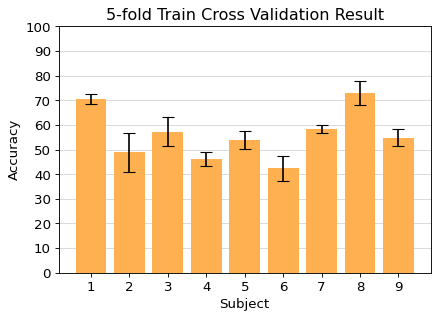

====== Accuracy for all subjects ======
Subject01 : 70.49 % +/- 2.14
Subject02 : 48.93 % +/- 7.96
Subject03 : 57.33 % +/- 6.01
Subject04 : 46.16 % +/- 2.75
Subject05 : 53.79 % +/- 3.57
Subject06 : 42.38 % +/- 4.96
Subject07 : 58.34 % +/- 1.79
Subject08 : 72.93 % +/- 4.98
Subject09 : 54.87 % +/- 3.51


In [60]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=80)
plt.rcParams.update({'font.size': 12})
ax.set_title('Accuracy (%)')
ax.grid(axis='y', alpha=0.5)
ax.bar(np.arange(1, ns), eval_acc, color="#ffb152", yerr=eval_std, capsize=5)
ax.set(xticks=np.arange(1, ns), xlabel='Subject', 
       yticks=np.arange(0, 101, step=10), ylabel='Accuracy',
       title='5-fold Train Cross Validation Result')
ax.set_axisbelow(True)
plt.savefig('5fold_train_result.jpg', bbox_inches='tight')
plt.show()

# Print each subject accuracy
print("====== Accuracy for all subjects ======")
for i in range(ns-1):
    print("Subject{:02d} : {:.2f} % +/- {:.2f}".format(i+1, eval_acc[i], eval_std[i]))

## Result on Test Data
Based on initial observation, svc model performed well on train data. Thus we will proceed to use the current model to evaluate on test data 

In [67]:
from scipy.io import loadmat
import os

label_dir = "/Users/nathandayie/Downloads/School/Vinjamuri Lab/VinjamuriEEGProject/true_labels"

for i in range(1, ns):
    subj = subject_counter(i)
    filename = f"A{i:02d}E.mat"
    mat_path = os.path.join(label_dir, filename)

    label_data = loadmat(mat_path)
    true_labels = label_data['classlabel'].flatten()  # shape: (288,)

    mod_eval_data[subj]['test']['mutual']['y'] = true_labels
    print(f"{subj}: Loaded {len(true_labels)} test labels.")


subject01: Loaded 288 test labels.
subject02: Loaded 288 test labels.
subject03: Loaded 288 test labels.
subject04: Loaded 288 test labels.
subject05: Loaded 288 test labels.
subject06: Loaded 288 test labels.
subject07: Loaded 288 test labels.
subject08: Loaded 288 test labels.
subject09: Loaded 288 test labels.


In [68]:
# Blank list to store accuracy values
train_score = []
test_score = []

for i in range(1, ns):
    subj = subject_counter(i)

    X_train = mod_data[subj]['mutual']['X']
    y_train = mod_data[subj]['mutual']['y']
    X_test = mod_eval_data[subj]['test']['mutual']['X']
    y_test = mod_eval_data[subj]['test']['mutual']['y']  # ✅ now defined

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    test_score.append(acc)

    print(f"{subj}: Test Accuracy = {acc:.2f}%")


subject01: Test Accuracy = 20.49%
subject02: Test Accuracy = 17.71%
subject03: Test Accuracy = 25.00%
subject04: Test Accuracy = 18.75%
subject05: Test Accuracy = 4.17%
subject06: Test Accuracy = 19.44%
subject07: Test Accuracy = 25.35%
subject08: Test Accuracy = 21.18%
subject09: Test Accuracy = 27.78%


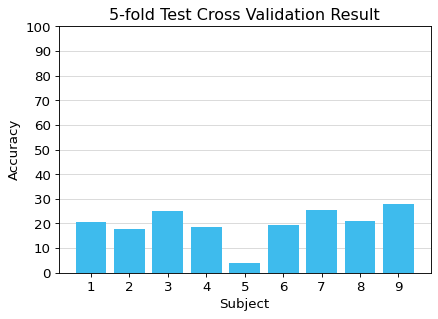

====== Test Accuracy for all subjects ======
Subject01 : 20.49 %
Subject02 : 17.71 %
Subject03 : 25.00 %
Subject04 : 18.75 %
Subject05 : 4.17 %
Subject06 : 19.44 %
Subject07 : 25.35 %
Subject08 : 21.18 %
Subject09 : 27.78 %


In [69]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=80)
plt.rcParams.update({'font.size': 12})
ax.set_title('Accuracy (%)')
ax.grid(axis='y', alpha=0.5)
ax.bar(np.arange(1, ns), test_score, color="#3ebbed")
ax.set(xticks=np.arange(1, ns), xlabel='Subject', 
       yticks=np.arange(0, 101, step=10), ylabel='Accuracy',
       title='5-fold Test Cross Validation Result')
ax.set_axisbelow(True)
plt.savefig('5fold_test_result.jpg', bbox_inches='tight')
plt.show()

# Print each subject accuracy
print("====== Test Accuracy for all subjects ======")
for i in range(ns-1):
    print("Subject{:02d} : {:.2f} %".format(i+1, test_score[i]))